In [98]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from math import log
from datetime import datetime

In [2]:
# function we want to integrate
def f(t,x):
    dxdt=x
    return dxdt

In [24]:
#euler step function
def euler_step(func, xn,tn,h): 
    xn_1 = xn + h*f(tn, xn)
    tn_1 = tn + h
    return np.array((tn_1, xn_1))

In [25]:
# RK4 Method
def RK4(func, xn, tn,h):
    k1= func(tn, xn)
    k2= func(tn+h/2, xn+h*(k1/2))
    k3= func(tn+h/2, xn+h*(k2/2))
    k4= func(tn+h, xn+h*k3)
    xn_1 = xn + h*(k1+2*(k2+k3) +k4)/6
    tn_1 = tn + h
    return np.array((tn_1, xn_1))

In [22]:
# #POTENTIALLY REMOVE
# def solve_to(step_function, func, x1, t1, t2, hmax):
#     t=t1
#     x=x1
#     N=math.ceil((t2-t1)/hmax)
    
#     for i in range(N-1):
#         x = step_function(func, x, t, hmax)
#         t += hmax
#         i += 1
    
#     if t < t2:
#         hmax = t2-t
#         x = step_function(func, x, t, hmax)
#         t=t2
#     return np.array((t,x))

In [26]:
#lets user select whether to use euler or RK4 wrapped in variable step_fun
def solve_to(step_fun, func, x1, t1, t2, hmax):
    t=t1
    x=x1
    sol=np.array([t,x], ndmin=2)
    while t != t2:
        if (t2-t) >= hmax:
            result = step_fun(func, x, t, hmax)
        else:
            result = step_fun(func, x, t, (t2-t))
        t = result[0]
        x = result[1]
        sol = np.append(sol, [result], axis=0)
        
    return sol  

In [27]:
solve_to(euler_step, f, 1, 0, 1, 0.3)

array([[0.    , 1.    ],
       [0.3   , 1.3   ],
       [0.6   , 1.69  ],
       [0.9   , 2.197 ],
       [1.    , 2.4167]])

In [ ]:
# #step function is either RK4 or euler 
# def solve_ode(step_fun, func, x0, t0, tf, hmax):
#     N=math.ceil((tf-t0)/hmax)
#     t=np.linspace(t0, tf, N+1)
#     #array to store solution at each time step
#     X=np.zeros(N+1)
#     X[0]=x0
#     t[0]=t0
    
#     for i in range (N):
#         X[i+1] = solve_to(step_fun, func, X[i], t[i], t[i+1], hmax)[1]
#         t[i+1] = solve_to(step_fun, func, X[i], t[i], t[i+1], hmax)[0]
#     return np.array((t, X))

In [28]:
def solve_ode(step_function, func, x0, t0, tf, hmax):
    sol = solve_to(step_fun, func, x0, t0, tf, hmax)
    return sol

In [29]:
print("Please enter 'a' for Euler method or 'b' for Runge-Kutta method: ")
answer=input()

Please enter 'a' for Euler method or 'b' for Runge-Kutta method: 
a


In [30]:
print("Please enter max step size: ")
hmax=float(input())

Please enter max step size: 
0.25


In [63]:
t0=0
tf=5
x0=1
if answer=="a":
    step_fun=euler_step
    sol=solve_ode(step_fun, f, x0, t0, tf, hmax)
if answer=="b":
    step_fun=RK4
    sol=solve_ode(step_fun, f, x0, t0, tf, hmax)

t=sol[:,0]
x=sol[:,1]
print(x)

#check these values of x- i don't think they're correct

[ 1.          1.25        1.5625      1.953125    2.44140625  3.05175781
  3.81469727  4.76837158  5.96046448  7.4505806   9.31322575 11.64153218
 14.55191523 18.18989404 22.73736754 28.42170943 35.52713679 44.40892099
 55.51115123 69.38893904 86.7361738 ]


In [100]:
def error(func, x0, t0, tf):
    # N + 0.000001 to satisfy no division by 0 if t0=0?
    N=np.linspace(t0+0.000001, tf, 101)
    h=np.zeros(np.size(N))
    sol_E=np.zeros(np.size(N))
    sol_RK4=np.zeros(np.size(N))
    exact_sol=np.zeros(np.size(N))
    error_E=np.zeros(np.size(N))
    error_RK4=np.zeros(np.size(N))
       
    for i in range (np.size(N)):
        
        h[i]=(tf-t0)/(N[i])
        
        #add in analytical solution here
        exact_sol[i]=np.exp(1)
        sol_E[i]=solve_ode(euler_step, func, x0, t0, tf, h[i])[-1,1]
        sol_RK4[i]=solve_ode(RK4, func, x0, t0, tf,h[i])[-1,1]
        error_E[i]=abs(exact_sol[i]-sol_E[i])
        error_RK4[i]=abs(exact_sol[i]-sol_RK4[i])
        
    return np.array((h, error_E, error_RK4))

In [103]:
#why is the last value of exact_sol always 0?
print(error(f, x0, t0, tf)[1])

[ 3.28171817  3.28171817  3.28171817  3.28171817  3.28171817  3.28171817
  3.28171817  3.28171817  3.28171817  3.28171817  3.28171817  3.28171817
  3.28171817  3.28171817  3.28171817  3.28171817  3.28171817  3.28171817
  3.28171817  3.28171817  3.28173817  4.41552123  5.34784706  6.11726768
  6.75394919  7.28172537  7.71959389  8.08282039  8.38376292  8.63249426
  8.83727632  9.00492525  9.14109483  9.25049817  9.3370825   9.40416791
  9.45455823  9.49063016  9.51440538  9.52760914  9.5317313  10.55092162
 11.43419504 12.19918009 12.86098877 13.43261564 13.92526711 14.34863428
 14.7111198  15.02002739 15.28172057 15.50175617 15.68499696 15.83570697
 15.9576324  16.05407055 16.12792864 16.18177417 16.21787815 16.2382523
 16.24468904 17.1748139  17.99795682 18.7252008  19.36639352 19.9302986
 20.42472662 20.8566488  21.23229571 21.55724343 21.83648857 22.07451398
 22.27534631 22.44260645 22.57955395 22.68912606 22.77397227 22.83648467
 22.87882496 22.90294829 22.91062798 23.75377619 24.5

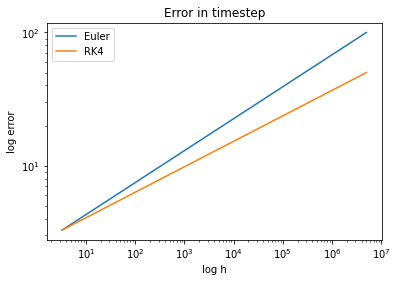

In [105]:
delta_h=error(f, x0, t0, tf)[:,0]
error_E=error(f, x0, t0, tf)[:,1]
error_RK4=error(f, x0, t0, tf)[:,2]

plt.plot(delta_h, error_E, delta_h, error_RK4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('log h')
plt.ylabel('log error')
plt.legend(('Euler', 'RK4'))
plt.title('Error in timestep')
plt.show()

In [ ]:
def f2(t,z):
    z=[y,v]
    dydt=z[1]
    dvdt=-z[0]
    return np.array((dydt, dvdt))